In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torchvision import datasets, transforms
import time

C:\Users\HARSH\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\HARSH\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
# data preprocessing
transformation = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0., ), (0.5, ))])

In [3]:
train_val_dataset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download= True, train= True, transform= transformation)
test_dataset = datasets.MNIST('PATH_TO_STORE_TESTSET', download= True, train= False, transform= transformation)

In [4]:
train_val_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: PATH_TO_STORE_TRAINSET
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.0,), std=(0.5,))
           )

In [5]:
# counts check
len(train_val_dataset), len(test_dataset)

(60000, 10000)

In [6]:
# split to train, val 
train_dataset, val_dataset = torch.utils.data.random_split(train_val_dataset, [50000, 10000])

In [7]:
# counts check
len(train_dataset), len(val_dataset), len(test_dataset)

(50000, 10000, 10000)

In [8]:
# DataLoaders

batch_size = 64

train_loader = torch.utils.data.DataLoader(dataset= train_dataset, batch_size= batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset= val_dataset, batch_size= batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset= test_dataset, batch_size= batch_size, shuffle=True)

In [9]:
train_loader

In [10]:
# 1 batch
x, y = next(iter(train_loader))
print('x.shape: ', x.shape)
print('y.shape: ', y.shape)

x.shape:  torch.Size([64, 1, 28, 28])
y.shape:  torch.Size([64])


In [11]:
x[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0235, 0.1412, 0.8627, 1.8510,
          1.9922, 2.0000, 1.4510, 0.8706, 0.0000, 0.0000,

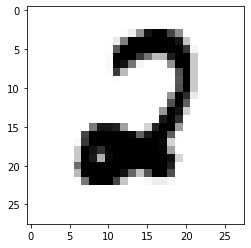


Label:  2


In [12]:
# visualization
plt.imshow(x[0].numpy().squeeze(), cmap='gray_r')
plt.show()
print('\nLabel: ', y[0].item())

In [13]:
# Model S
class FCNN(torch.nn.Module):
  def __init__(self, in_size, hidden_size, out_size):
    super().__init__()
    # input layer
    self.in_layer = torch.nn.Linear(in_features= in_size, out_features= hidden_size)
    self.in_layer_act = torch.nn.ReLU()

    # hidden layer
    self.hidden_layer = torch.nn.Linear(in_features= hidden_size, out_features= hidden_size)
    self.hidden_layer_act = torch.nn.ReLU()

    # output layer
    self.out_layer = torch.nn.Linear(in_features= hidden_size, out_features= out_size)
    self.out_layer_act = torch.nn.LogSoftmax(dim=1)

  def forward(self, x):
    # input layer
    x = self.in_layer_act(self.in_layer(x))

    # hidden layer
    x = self.hidden_layer_act(self.hidden_layer(x))

    # output layer
    x = self.out_layer_act(self.out_layer(x))

    return x

In [14]:
print(FCNN(784, 100, 10))

FCNN(
  (in_layer): Linear(in_features=784, out_features=100, bias=True)
  (in_layer_act): ReLU()
  (hidden_layer): Linear(in_features=100, out_features=100, bias=True)
  (hidden_layer_act): ReLU()
  (out_layer): Linear(in_features=100, out_features=10, bias=True)
  (out_layer_act): LogSoftmax(dim=1)
)


In [15]:
# Model 3
class DNN(torch.nn.Module):
  def __init__(self, in_size, num_hidden, hidden_size, out_size):
    super().__init__()
    # input layer
    self.in_layer = torch.nn.Linear(in_features= in_size, out_features= hidden_size)
    self.in_layer_act = torch.nn.ReLU()

    # hidden layers
    self.hidden_layers = torch.nn.ModuleList()
    for _ in range(num_hidden):
      self.hidden_layers.append(torch.nn.Linear(in_features= hidden_size, out_features= hidden_size))
      self.hidden_layers.append(torch.nn.ReLU())

    # output layer
    self.out_layer = torch.nn.Linear(in_features= hidden_size, out_features= out_size)
    self.out_layer_act = torch.nn.LogSoftmax(dim=1)

  def forward(self, x):
    # input layer
    x = self.in_layer_act(self.in_layer(x))

    # hidden layers
    for i in range(len(self.hidden_layers)):
      x = self.hidden_layers[i](x)

    # output layer
    x = self.out_layer_act(self.out_layer(x))

    return x

In [16]:
print(DNN(784, 10, 10, 10))

DNN(
  (in_layer): Linear(in_features=784, out_features=10, bias=True)
  (in_layer_act): ReLU()
  (hidden_layers): ModuleList(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): ReLU()
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): ReLU()
    (10): Linear(in_features=10, out_features=10, bias=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): ReLU()
    (14): Linear(in_features=10, out_features=10, bias=True)
    (15): ReLU()
    (16): Linear(in_features=10, out_features=10, bias=True)
    (17): ReLU()
    (18): Linear(in_features=10, out_features=10, bias=True)
    (19): ReLU()
  )
  (out_layer): Linear(in_features=10, out_features=10, bias=True)
  (out_layer_act): LogSoftmax(dim

In [17]:
# device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [18]:
# Instantiation
model_S = FCNN(784, 100, 10) 
model_3 = DNN(784, 10, 10, 10)

In [19]:
# criterion
criterion = torch.nn.NLLLoss(reduction= 'mean')

In [20]:
def train_model(model, criterion, optimizer, num_epochs, train_loader, val_loader, save_name, device, return_model_object):
  train_costs = []
  val_costs = []
  least_val_cost = float('inf')
  version = -1
  

  for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    running_loss = 0
    i = 0
    for x, y in train_loader:
      # gradients clear
      optimizer.zero_grad()

      # input
      predictions = model(x.view(x.shape[0], -1).to(device))

      # loss calculation
      loss = criterion(predictions, y.to(device))

      # backprop
      loss.backward()

      # optimization
      optimizer.step()

      running_loss += loss.item()
      i += 1

    train_cost = running_loss / i

    # val cost
    running_loss = 0
    i = 0
    model.eval()
    for x, y in val_loader:
      # input
      predictions = model(x.view(x.shape[0], -1).to(device))

      # loss calculation
      loss = criterion(predictions, y.to(device))

      running_loss += loss.item()
      i += 1
    model.train()

    val_cost = running_loss / i

    if val_cost < least_val_cost:
      version += 1
      torch.save(model.state_dict(), save_name + '_{}.pt'.format(version))
      least_val_cost = val_cost

    train_costs.append(train_cost)
    val_costs.append(val_cost)

    end_time = time.time()

    print('Epoch: {} / {} || Train Cost: {} || Val Cost: {} || Time taken(in sec): {}'.format(epoch+1, num_epochs, train_cost, val_cost, round(end_time-start_time, 3)))

  print('-'*10)
  print('Training Finished!!')
  print('Least Val Cost: ', least_val_cost)
  print('Returned Version: ', version)

  plt.plot([i+1 for i in range(num_epochs)], train_costs, label='train_costs', c='r')
  plt.plot([i+1 for i in range(num_epochs)], val_costs, label='val_costs', alpha=0.75, c='g')
  plt.xlabel('Epoch')
  plt.ylabel('Log-likelihood Loss, mean reduced')
  plt.title('Epoch Cost')
  plt.legend()
  plt.show()

  # trained weights
  model_object = return_model_object
  model_object.load_state_dict(torch.load(save_name + '_{}.pt'.format(version)))

  return model_object

In [21]:
def get_accuracy(model, test_loader, device):
  correct_count, all_count = 0, 0
  model.eval()
  for images,labels in test_loader:
    for i in range(len(labels)):
      img = images[i].view(1, 784)
      with torch.no_grad():
          logps = model(img)

      
      ps = torch.exp(logps)
      probab = list(ps.numpy()[0])
      pred_label = probab.index(max(probab))
      true_label = labels.numpy()[i]
      if(true_label == pred_label):
        correct_count += 1
      all_count += 1

  return correct_count, all_count, correct_count / all_count

In [22]:
# optimizer
model_S = model_S.to(device)
optimizer_S = torch.optim.Adam(model_S.parameters())

Epoch: 1 / 30 || Train Cost: 0.32649586292560145 || Val Cost: 0.1869121814134774 || Time taken(in sec): 17.95
Epoch: 2 / 30 || Train Cost: 0.137027952480642 || Val Cost: 0.13379975020363452 || Time taken(in sec): 11.86
Epoch: 3 / 30 || Train Cost: 0.09474141225861886 || Val Cost: 0.13082219683416899 || Time taken(in sec): 11.148
Epoch: 4 / 30 || Train Cost: 0.07296407213607264 || Val Cost: 0.1093684040294711 || Time taken(in sec): 11.432
Epoch: 5 / 30 || Train Cost: 0.05559176629286526 || Val Cost: 0.1046694129124094 || Time taken(in sec): 10.754
Epoch: 6 / 30 || Train Cost: 0.04561727926554277 || Val Cost: 0.10723171754781703 || Time taken(in sec): 10.783
Epoch: 7 / 30 || Train Cost: 0.034967054522273555 || Val Cost: 0.1096729017233559 || Time taken(in sec): 10.675
Epoch: 8 / 30 || Train Cost: 0.032309987813682724 || Val Cost: 0.09901964007713683 || Time taken(in sec): 10.644
Epoch: 9 / 30 || Train Cost: 0.026411863539153247 || Val Cost: 0.10825563981464714 || Time taken(in sec): 10.6

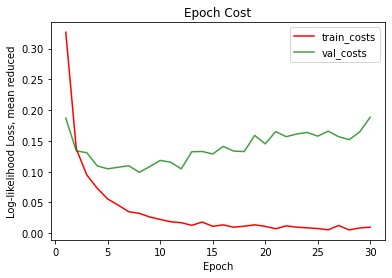

In [23]:
trained_model_S = train_model(model= model_S, criterion= criterion, optimizer= optimizer_S, num_epochs=30, train_loader= train_loader, val_loader= val_loader, save_name= 'model_S', device=device, return_model_object= FCNN(784, 100, 10))

In [24]:
trained_model_S

FCNN(
  (in_layer): Linear(in_features=784, out_features=100, bias=True)
  (in_layer_act): ReLU()
  (hidden_layer): Linear(in_features=100, out_features=100, bias=True)
  (hidden_layer_act): ReLU()
  (out_layer): Linear(in_features=100, out_features=10, bias=True)
  (out_layer_act): LogSoftmax(dim=1)
)

In [25]:
# model_3

In [26]:
# optimizer
model_3 = model_3.to(device)
optimizer_3 = torch.optim.Adam(model_3.parameters())

Epoch: 1 / 60 || Train Cost: 1.6178867502895462 || Val Cost: 1.2128671092592227 || Time taken(in sec): 19.073
Epoch: 2 / 60 || Train Cost: 0.9572723584101938 || Val Cost: 0.866412280851109 || Time taken(in sec): 19.117
Epoch: 3 / 60 || Train Cost: 0.7726379408098548 || Val Cost: 0.7366413202635043 || Time taken(in sec): 19.105
Epoch: 4 / 60 || Train Cost: 0.6827648480225097 || Val Cost: 0.6836727802540846 || Time taken(in sec): 18.933
Epoch: 5 / 60 || Train Cost: 0.6350546876144836 || Val Cost: 0.6558673564036182 || Time taken(in sec): 18.976
Epoch: 6 / 60 || Train Cost: 0.5989887714385986 || Val Cost: 0.6144064342140392 || Time taken(in sec): 18.836
Epoch: 7 / 60 || Train Cost: 0.571745721351765 || Val Cost: 0.6047540242504922 || Time taken(in sec): 18.977
Epoch: 8 / 60 || Train Cost: 0.545934823925233 || Val Cost: 0.578440039875401 || Time taken(in sec): 19.046
Epoch: 9 / 60 || Train Cost: 0.5245755243179439 || Val Cost: 0.5642876205550638 || Time taken(in sec): 18.896
Epoch: 10 / 60

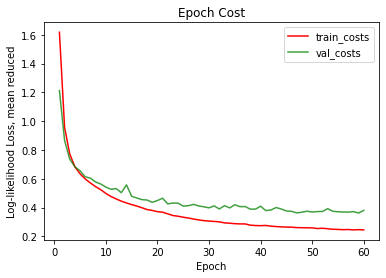

In [27]:
trained_model_3 = train_model(model= model_3, criterion= criterion, optimizer= optimizer_3, num_epochs=60, train_loader= train_loader, val_loader= val_loader, save_name= 'model_3', device=device, return_model_object= DNN(784, 10, 10, 10))

In [28]:
trained_model_3 

DNN(
  (in_layer): Linear(in_features=784, out_features=10, bias=True)
  (in_layer_act): ReLU()
  (hidden_layers): ModuleList(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): ReLU()
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): ReLU()
    (10): Linear(in_features=10, out_features=10, bias=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): ReLU()
    (14): Linear(in_features=10, out_features=10, bias=True)
    (15): ReLU()
    (16): Linear(in_features=10, out_features=10, bias=True)
    (17): ReLU()
    (18): Linear(in_features=10, out_features=10, bias=True)
    (19): ReLU()
  )
  (out_layer): Linear(in_features=10, out_features=10, bias=True)
  (out_layer_act): LogSoftmax(dim

In [29]:
# Model S
model_results_S = get_accuracy(trained_model_S, test_loader, device)
print('Model S: Correctly Classified: {} / {} || Accuracy: {}'.format(model_results_S[0], model_results_S[1], model_results_S[2]))

Model S: Correctly Classified: 9777 / 10000 || Accuracy: 0.9777


In [30]:
# Model 3
model_results_3 = get_accuracy(trained_model_3, test_loader, device)
print('Model 3: Correctly Classified: {} / {} || Accuracy: {}'.format(model_results_3[0], model_results_3[1], model_results_3[2]))

Model 3: Correctly Classified: 9196 / 10000 || Accuracy: 0.9196


In [31]:
# Feature Extraction

In [32]:
# Target Features: layer 5, 7, 10 >> hidden_layers: (9), (13), (19)

In [33]:
# Target Layers

trained_model_3.hidden_layers[9], trained_model_3.hidden_layers[13], trained_model_3.hidden_layers[19]

(ReLU(), ReLU(), ReLU())

In [34]:
# Hook utility func
activation = {}
def getActivation(name):
  # the hook signature
  def hook(model, input, output):
    activation[name] = output.detach()
  return hook

In [35]:
trained_model_3 = trained_model_3.to(device)

In [36]:
# Train DataLoader

# Register forward hooks
h1 = trained_model_3.hidden_layers[9].register_forward_hook(getActivation('hidden_layers.9'))
h2 = trained_model_3.hidden_layers[13].register_forward_hook(getActivation('hidden_layers.13'))
h3 = trained_model_3.hidden_layers[19].register_forward_hook(getActivation('hidden_layers.19'))

l_5_features_train, l_7_features_train, l_10_features_train = [], [], []
l_all_labels_train = []

for x, y in train_loader:

  # forward pass
  prediction = trained_model_3(x.view(x.shape[0], -1).to(device))

  # Layer 5
  l_5_features_train.extend(activation['hidden_layers.9'].cpu().numpy())

  # Layer 7
  l_7_features_train.extend(activation['hidden_layers.13'].cpu().numpy())
  
  # Layer 10
  l_10_features_train.extend(activation['hidden_layers.19'].cpu().numpy())
  l_all_labels_train.extend(y.cpu().numpy())

h1.remove()
h2.remove()
h3.remove()

In [37]:
# Val DataLoader

# Register forward hooks
h1 = trained_model_3.hidden_layers[9].register_forward_hook(getActivation('hidden_layers.9'))
h2 = trained_model_3.hidden_layers[13].register_forward_hook(getActivation('hidden_layers.13'))
h3 = trained_model_3.hidden_layers[19].register_forward_hook(getActivation('hidden_layers.19'))

l_5_features_val, l_7_features_val, l_10_features_val = [], [], []
l_all_labels_val = []

for x, y in val_loader:

  # forward pass
  prediction = trained_model_3(x.view(x.shape[0], -1).to(device))

  # Layer 5
  l_5_features_val.extend(activation['hidden_layers.9'].cpu().numpy())

  # Layer 7
  l_7_features_val.extend(activation['hidden_layers.13'].cpu().numpy())
  
  # Layer 10
  l_10_features_val.extend(activation['hidden_layers.19'].cpu().numpy())
  l_all_labels_val.extend(y.cpu().numpy())

h1.remove()
h2.remove()
h3.remove()

In [38]:
# Test DataLoader

# Register forward hooks
h1 = trained_model_3.hidden_layers[9].register_forward_hook(getActivation('hidden_layers.9'))
h2 = trained_model_3.hidden_layers[13].register_forward_hook(getActivation('hidden_layers.13'))
h3 = trained_model_3.hidden_layers[19].register_forward_hook(getActivation('hidden_layers.19'))

l_5_features_test, l_7_features_test, l_10_features_test = [], [], []
l_all_labels_test = []

for x, y in test_loader:

  # forward pass
  prediction = trained_model_3(x.view(x.shape[0], -1).to(device))

  # Layer 5
  l_5_features_test.extend(activation['hidden_layers.9'].cpu().numpy())

  # Layer 7
  l_7_features_test.extend(activation['hidden_layers.13'].cpu().numpy())
  
  # Layer 10
  l_10_features_test.extend(activation['hidden_layers.19'].cpu().numpy())
  l_all_labels_test.extend(y.cpu().numpy())

h1.remove()
h2.remove()
h3.remove()

In [39]:
# Count Check
len(l_all_labels_train), len(l_all_labels_val), len(l_all_labels_test)

(50000, 10000, 10000)

In [40]:
l_5_features_train[0]

array([19.084444  , 17.63852   , 12.890121  ,  0.        ,  0.        ,
       13.285548  ,  0.22362253,  0.        ,  0.34695846,  8.851758  ],
      dtype=float32)

In [41]:
# Train + Val

# Features
l_5_features_train_dev = l_5_features_train + l_5_features_val
l_7_features_train_dev = l_7_features_train + l_7_features_val
l_10_features_train_dev = l_10_features_train + l_10_features_val

# Labels
l_all_labels_train_dev = l_all_labels_train + l_all_labels_val

In [42]:
# Counts check
len(l_5_features_train_dev), len(l_all_labels_train_dev)

(60000, 60000)

In [43]:
# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [45]:
# Layer 5 features
clf_1 = KNeighborsClassifier(n_neighbors=50)

In [46]:
clf_1 = clf_1.fit(l_5_features_train_dev, l_all_labels_train_dev)

In [47]:
preds_1 = clf_1.predict(l_5_features_test)

In [48]:
acc_1 = accuracy_score(l_all_labels_test, preds_1)

In [49]:
# Layer 7 features
clf_2 = KNeighborsClassifier(n_neighbors=50)

In [50]:
clf_2 = clf_2.fit(l_7_features_train_dev, l_all_labels_train_dev)

In [51]:
preds_2 = clf_2.predict(l_7_features_test)

In [52]:
acc_2 = accuracy_score(l_all_labels_test, preds_2)

In [53]:
# Layer 10 features
clf_3 = KNeighborsClassifier(n_neighbors=50)

In [54]:
clf_3 = clf_3.fit(l_10_features_train_dev, l_all_labels_train_dev)

In [55]:
preds_3 = clf_3.predict(l_10_features_test)

In [56]:
acc_3 = accuracy_score(l_all_labels_test, preds_3)

In [57]:
acc_1, acc_2, acc_3

(0.9199, 0.9203, 0.9202)

In [58]:
def get_best_fit(max_k, train_features, train_labels, test_features, test_labels, layer: int):
  best_accuracy = -1
  corres_k = -1
  accuracies = []

  for k in range(1, max_k+1):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf = clf.fit(train_features, train_labels)
    preds = clf.predict(test_features)
    acc = accuracy_score(test_labels, preds)
    accuracies.append(acc)
    if acc > best_accuracy:
      best_accuracy = acc
      corres_k = k
    print("\r", end="")
    print("Process Completed: {:.1%} ".format(k/max_k), end="")

  print('\n\nBest Accuracy using Layer {} activations: {} for K = {}\n'.format(layer, best_accuracy, corres_k))

  plt.plot([*range(1, max_k+1)], accuracies, label='accuracies')
  plt.xlabel('K')
  plt.ylabel('accuracy score')
  plt.title('Layer: {}'.format(layer))
  plt.legend()
  plt.show()

  return best_accuracy, corres_k

Process Completed: 100.0% 

Best Accuracy using Layer 5 activations: 0.9213 for K = 17



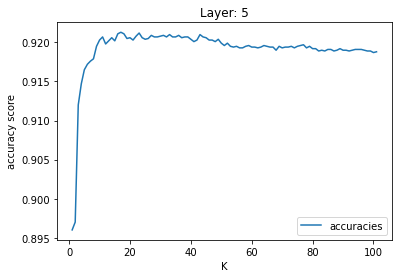

In [59]:
acc_1, k_1 = get_best_fit(101, l_5_features_train_dev, l_all_labels_train_dev, l_5_features_test, l_all_labels_test, 5)

Process Completed: 100.0% 

Best Accuracy using Layer 7 activations: 0.921 for K = 24



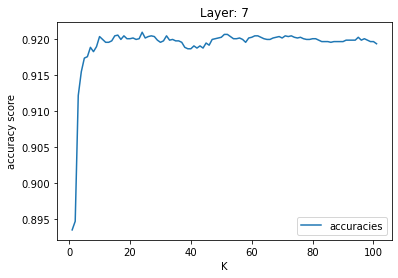

In [60]:
acc_2, k_2 = get_best_fit(101, l_7_features_train_dev, l_all_labels_train_dev, l_7_features_test, l_all_labels_test, 7)

Process Completed: 100.0% 

Best Accuracy using Layer 10 activations: 0.9222 for K = 16



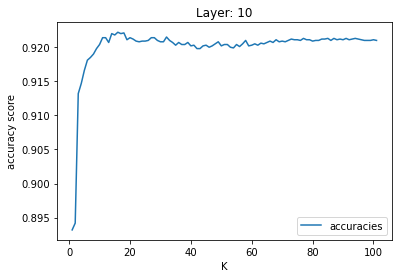

In [61]:
acc_3, k_3 = get_best_fit(101, l_10_features_train_dev, l_all_labels_train_dev, l_10_features_test, l_all_labels_test, 10)

In [62]:
# Best Accuracies:
print('Best Accuracies:\n')
print('Neural Nets:')
print('-'*10)
print('For Model S: Acc: {}'.format(model_results_S[2]))
print('For Model 3: Acc: {}'.format(model_results_3[2]))
print('KNN:')
print('-'*10)
print('For Layer 5: Acc = {} & K = {}'.format(acc_1, k_1))
print('For Layer 7: Acc = {} & K = {}'.format(acc_2, k_2))
print('For Layer 10: Acc = {} & K = {}'.format(acc_3, k_3))

Best Accuracies:

Neural Nets:
----------
For Model S: Acc: 0.9777
For Model 3: Acc: 0.9196
KNN:
----------
For Layer 5: Acc = 0.9213 & K = 17
For Layer 7: Acc = 0.921 & K = 24
For Layer 10: Acc = 0.9222 & K = 16
